In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from scipy.optimize import fsolve

import matplotlib
from matplotlib.colors import BoundaryNorm, ListedColormap

In [2]:
def F(D,a3,K):
    return ( (np.exp(a3 * D) - 1) / (np.exp(a3) - 1) ) - K * D

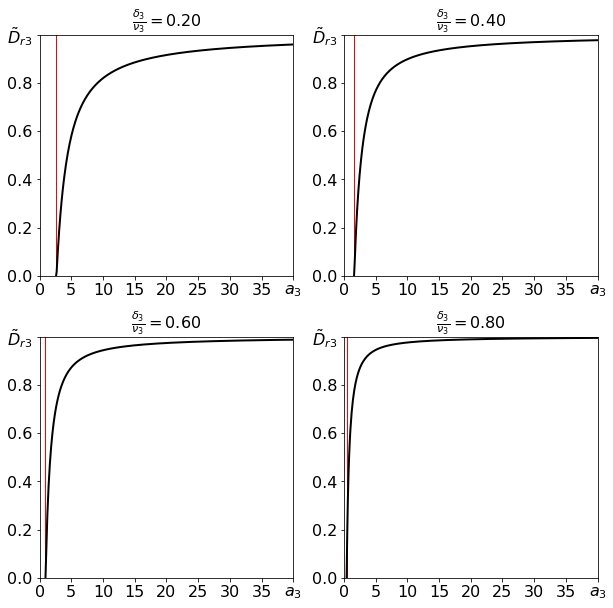

In [3]:
Ks = [0.2,0.4,0.6,0.8]

a3s=[0.001 * i for i in range(1,100000)]

thresh = 10**(-2)

fig, axs = plt.subplots(2,2,figsize=(10,10))

for n, K in enumerate(Ks):
    
    for a in a3s:
        
        a_star=-1
        
        if (K-thresh < ((a) / (np.exp(a)-1)) < K+thresh):
        
            a_star = a
            break
        
    if a_star == -1:
        print('failed')
        break
            
    a3_space = np.linspace(a_star+0.01,100,1000)
    f_a3_l= []
        
    for a in a3_space:

        f_a3_l.append(fsolve(F,1,args=(a,K)))
        
    f_a3 = np.array(f_a3_l)
        
    if n == 0:
        i = 0
        j = 0
    elif n == 1:
        i = 0
        j = 1
    elif n == 2:
        i = 1
        j = 0
    elif n == 3:
        i = 1
        j = 1
    
    axs[i,j].plot(a3_space,f_a3,'k',linewidth=2)
    
    axs[i,j].set_xlim(0,40)
    axs[i,j].set_ylim(0,1)
    
    axs[i,j].vlines(a_star,0,100,'r',linewidth=1,label=r'$a_3$ such that $\frac{a_3}{e^{a_3}-1}=\frac{\delta_3}{\nu_3}$')
    
    axs[i,j].set_title(r'$\frac{\delta_3}{\nu_3}=$%.2f'%K,fontsize=16)
    
    axs[i,j].set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])
    axs[i,j].set_yticklabels(['0.0','0.2','0.4','0.6','0.8',r'$\tilde{D}_{r3}$'],fontsize=16)
    
    axs[i,j].set_xticks([0,5,10,15,20,25,30,35,40])
    axs[i,j].set_xticklabels(['0','5','10','15','20','25','30','35',r'$a_3$'],fontsize=16)
    
fig.subplots_adjust(wspace=0.2,hspace=0.25)
